In [1]:
import CoolProp
CoolProp.__version__

'6.3.0'

In [2]:
from CoolProp.HumidAirProp import HAPropsSI

from sympy import *
init_printing()

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt, ticker as tk
%config InlineBackend.figure_format='retina'

Spezifische Enthalpie der trockenen Luft bei 20°C, 50% relativer Luftfeuchte und 1013.25 mbar Luftdruck:

In [3]:
T_0 = 273.15 # K

In [4]:
h = HAPropsSI('H', 'T', 298.15, 'P', 101325, 'R', 50e-2)
h # J

Isenthalpe Temperatur in K bei h, p, 100% relativer Luftfeuchte

In [5]:
T_h = HAPropsSI('T', 'H',h, 'P',101325, 'R', 100e-2)
T_h-T_0 # in °C

In [6]:
h = HAPropsSI('H', 'W', 10e-3, 'T', T_0 + 20, 'P', 101325)
h # J

In [7]:
x_s = HAPropsSI('W', 'T', T_0+20, 'R', 1.0,  'P', 101325)
x_s

In [8]:
h = HAPropsSI('H', 'T', T_0+20, 'W', x_s+2e-3, 'P', 101325)
h

In [9]:
def toggle_vals(*args):
    l = len(args)
    i = 0
    while i >= 0:
        yield args[i % l]
        i += 1
    

CPU times: user 448 ms, sys: 7.86 ms, total: 456 ms
Wall time: 464 ms


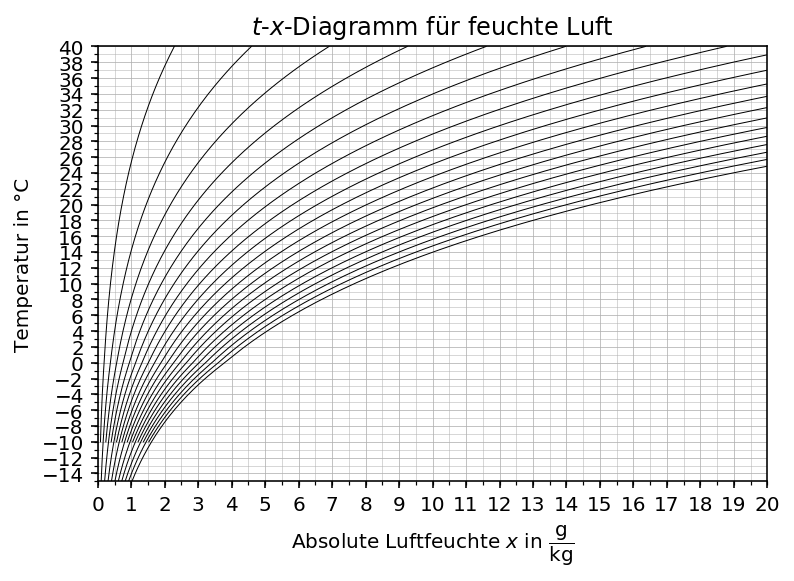

In [10]:
%%time
fig,ax = plt.subplots()

t_0 = toggle_vals(-10,-15)
t_1 = 40

for phi in np.arange(5e-2,101e-2,5e-2):
    ly = np.linspace(next(t_0),t_1,200)
    lx = HAPropsSI('W', 'T',ly+T_0, 'R',phi, 'P',101325)
    ax.plot(lx*1000,ly,c='k',lw=0.5)
    
ax.xaxis.set_major_locator(tk.MultipleLocator(1))
ax.xaxis.set_minor_locator(tk.MultipleLocator(0.5))
ax.yaxis.set_major_locator(tk.MultipleLocator(2))
ax.yaxis.set_minor_locator(tk.MultipleLocator(1))
ax.grid(lw=0.25,which='both')
ax.set(xlim=(0,20),ylim=(-15,40))
ax.set_title('$t$-$x$-Diagramm für feuchte Luft')
ax.set(
    xlabel=r'Absolute Luftfeuchte $x$ in $\dfrac{\mathrm{g}}{\mathrm{kg}}$',
    ylabel=r'Temperatur in °C'
)